In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)
      

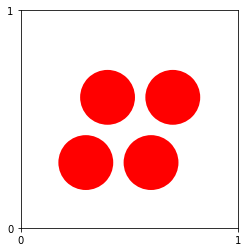

In [3]:
######################### Initialization #################################
L = 1. ## Box edge length
Natoms = 4  # Number of disks
density = 0.2 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.


## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities of disks.
positions_1 = np.array([[0.3,0.3],[0.4,0.6],[0.6, 0.3], [0.7,0.6]])
velocities_1 = np.array([[0.5,0.5],[1.,1.],[0.,1.],[0.,0.]])

positions_2 = np.array([[0.2,0.3],[0.4,0.6],[0.6, 0.3], [0.7,0.6]])
velocities_2 = np.array([[0.55,0.58],[1.18,1.],[0.,1.],[0.,0.]])


n_events = 50 # Number of collision events.
create_picture(positions_1)
#################################################################################

In [4]:
 ############### Event Loop ##############################################
t = 0.0 # Initial time
def event_loop(positions,velocities,t):
     # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    t += next_event 
    for i in range(Natoms):
        positions[i] += velocities[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    return positions,velocities,t
number_list=[]
event_list=[]
for event in range(n_events):
    event_list.append(event)
    diff_sum=0
    velo_sum=0
    for m in range(Natoms):
        vel_diff=velocities_1[m]-velocities_2[m]
        diff_sum += np.dot(vel_diff,vel_diff)
        velo_sum += np.dot(velocities_1[m],velocities_1[m])
    diml_number=diff_sum/velo_sum
    number_list.append(diml_number)
    positions_1,velocities_1,t=event_loop(positions_1,velocities_1,t)
    positions_2,velocities_2,t=event_loop(positions_2,velocities_2,t)
print(positions_1)
print(velocities_1)
##################################################################################
#print(number_list)

[[0.12615663 0.19399382]
 [0.58141661 0.72433252]
 [0.7858638  0.52069383]
 [0.84631279 0.79520648]]
[[ 1.21119645  0.0548678 ]
 [ 0.48440576  0.28652409]
 [ 0.62455421  1.12897361]
 [-0.02610795  0.21889883]]


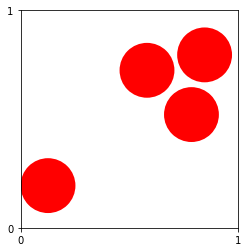

In [5]:
create_picture(positions_1)

Text(0, 0.5, 'number to measure chaos')

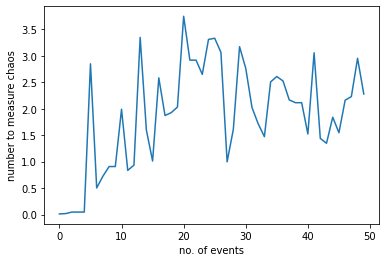

In [61]:
plt.plot(event_list,number_list)
plt.xlabel('no. of events')
plt.ylabel('number to measure chaos')

### Time reversibility

In [62]:
positions_st = np.array([[0.3,0.3],[0.4,0.6],[0.6, 0.3], [0.7,0.6]])
velocities_st = np.array([[0.5,0.5],[1.,1.],[0.,1.],[0.,0.]])
print("initial positions=",positions_st)
print("initial velocities=",velocities_st)
n_events_t=100
t_f=0
for event in range(n_events_t):
    positions_st,velocities_st,t_f=event_loop(positions_st,velocities_st,t_f)
print("final_positions=",positions_st)
print("final_velocities=",velocities_st)
print("time taken=",t_f)

for q in range(4):
    for p in range(2):
        velocities_st[q][p]= -1* velocities_st[q][p]

t_m=0
for event in range(n_events_t):
    positions_st,velocities_st,t_m=event_loop(positions_st,velocities_st,t_m)
    if(t_m>=t_f):
        break

print("initial positions after time reversal=",positions_st)
print("initial velocities after time reversal=",velocities_st)
print("time taken=",t_m)

initial positions= [[0.3 0.3]
 [0.4 0.6]
 [0.6 0.3]
 [0.7 0.6]]
initial velocities= [[0.5 0.5]
 [1.  1. ]
 [0.  1. ]
 [0.  0. ]]
final_positions= [[0.75012024 0.62098359]
 [0.54425405 0.46921162]
 [0.59296027 0.12615663]
 [0.13315405 0.80749982]]
final_velocities= [[-0.03982039 -0.77215191]
 [-0.1087258  -0.60611774]
 [-0.38253686  0.57755304]
 [-1.31306134  0.56476871]]
time taken= 6.8933637217730155
initial positions after time reversal= [[0.32654935 0.3263181 ]
 [0.45309526 0.6527514 ]
 [0.59951223 0.35259606]
 [0.69994483 0.60052815]]
initial velocities after time reversal= [[-0.49934927 -0.50145915]
 [-0.9889315  -1.00603022]
 [-0.00850895 -1.00442335]
 [-0.00380499  0.01239147]]
time taken= 6.840544108906614
